In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import pickle
from tqdm import tqdm
import cv2

In [2]:
# Activation Functions
def tanh(x):
    """Hyperbolic tangent activation function"""
    return np.tanh(x)

def tanh_derivative(x):
    """Derivative of tanh function"""
    return 1 - np.tanh(x) ** 2

def softmax(x):
    """Softmax activation function for output layer"""
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Convolution Operations
def conv2d(input_data, kernel, bias, stride=1, padding=0):
    """2D Convolution operation"""
    batch_size, in_channels, in_height, in_width = input_data.shape
    out_channels, _, kernel_height, kernel_width = kernel.shape
    
    # Add padding
    if padding > 0:
        input_data = np.pad(input_data, ((0, 0), (0, 0), (padding, padding), (padding, padding)), mode='constant')
    
    # Calculate output dimensions
    out_height = (in_height + 2 * padding - kernel_height) // stride + 1
    out_width = (in_width + 2 * padding - kernel_width) // stride + 1
    
    # Initialize output
    output = np.zeros((batch_size, out_channels, out_height, out_width))
    
    # Perform convolution
    for b in range(batch_size):
        for c_out in range(out_channels):
            for h in range(out_height):
                for w in range(out_width):
                    h_start = h * stride
                    h_end = h_start + kernel_height
                    w_start = w * stride
                    w_end = w_start + kernel_width
                    
                    # Convolution operation
                    output[b, c_out, h, w] = np.sum(
                        input_data[b, :, h_start:h_end, w_start:w_end] * kernel[c_out]
                    ) + bias[c_out]
    
    return output

def avg_pool2d(input_data, pool_size=2, stride=2):
    """Average pooling operation"""
    batch_size, channels, in_height, in_width = input_data.shape
    
    out_height = (in_height - pool_size) // stride + 1
    out_width = (in_width - pool_size) // stride + 1
    
    output = np.zeros((batch_size, channels, out_height, out_width))
    
    for b in range(batch_size):
        for c in range(channels):
            for h in range(out_height):
                for w in range(out_width):
                    h_start = h * stride
                    h_end = h_start + pool_size
                    w_start = w * stride
                    w_end = w_start + pool_size
                    
                    output[b, c, h, w] = np.mean(
                        input_data[b, c, h_start:h_end, w_start:w_end]
                    )
    
    return output

Loading Tifinagh dataset...
Total images: 28182
Number of classes: 33
Class names: ['ya', 'yab', 'yach', 'yad', 'yadd', 'yae', 'yaf', 'yag', 'yagg', 'yagh', 'yah', 'yahh', 'yaj', 'yak', 'yakk', 'yal', 'yam', 'yan', 'yaq', 'yar', 'yarr', 'yas', 'yass', 'yat', 'yatt', 'yaw', 'yax', 'yay', 'yaz', 'yazz', 'yey', 'yi', 'yu']
Train samples: 19727
Validation samples: 4227
Test samples: 4228

Training with SGD...


Epoch 1/10 [Train]: 100%|███████████████████| 1233/1233 [05:41<00:00,  3.61it/s]


Epoch [1/10]
Train Loss: 1.7857, Train Acc: 47.41%
Val Loss: 1.3044, Val Acc: 59.29%
--------------------------------------------------


Epoch 2/10 [Train]: 100%|███████████████████| 1233/1233 [05:43<00:00,  3.59it/s]


Epoch [2/10]
Train Loss: 1.0414, Train Acc: 67.81%
Val Loss: 0.9076, Val Acc: 72.34%
--------------------------------------------------


Epoch 3/10 [Train]: 100%|███████████████████| 1233/1233 [05:39<00:00,  3.63it/s]


Epoch [3/10]
Train Loss: 0.7632, Train Acc: 76.25%
Val Loss: 0.7536, Val Acc: 76.18%
--------------------------------------------------


Epoch 4/10 [Train]: 100%|███████████████████| 1233/1233 [05:38<00:00,  3.65it/s]


Epoch [4/10]
Train Loss: 0.6142, Train Acc: 80.51%
Val Loss: 0.6103, Val Acc: 80.25%
--------------------------------------------------


Epoch 5/10 [Train]: 100%|███████████████████| 1233/1233 [05:37<00:00,  3.65it/s]


Epoch [5/10]
Train Loss: 0.5062, Train Acc: 83.74%
Val Loss: 0.5250, Val Acc: 83.11%
--------------------------------------------------


Epoch 6/10 [Train]: 100%|███████████████████| 1233/1233 [06:05<00:00,  3.38it/s]


Epoch [6/10]
Train Loss: 0.4329, Train Acc: 86.22%
Val Loss: 0.4518, Val Acc: 85.14%
--------------------------------------------------


Epoch 7/10 [Train]: 100%|███████████████████| 1233/1233 [05:40<00:00,  3.62it/s]


Epoch [7/10]
Train Loss: 0.3997, Train Acc: 87.03%
Val Loss: 0.4110, Val Acc: 86.18%
--------------------------------------------------


Epoch 8/10 [Train]: 100%|███████████████████| 1233/1233 [05:38<00:00,  3.64it/s]


Epoch [8/10]
Train Loss: 0.3539, Train Acc: 88.29%
Val Loss: 0.3922, Val Acc: 86.66%
--------------------------------------------------


Epoch 9/10 [Train]: 100%|███████████████████| 1233/1233 [05:30<00:00,  3.73it/s]


Epoch [9/10]
Train Loss: 0.3265, Train Acc: 89.34%
Val Loss: 0.3541, Val Acc: 88.08%
--------------------------------------------------


Epoch 10/10 [Train]: 100%|██████████████████| 1233/1233 [05:27<00:00,  3.76it/s]


Epoch [10/10]
Train Loss: 0.2843, Train Acc: 90.75%
Val Loss: 0.2908, Val Acc: 89.83%
--------------------------------------------------

Training with Adam...


Epoch 1/10 [Train]: 100%|███████████████████| 1233/1233 [05:28<00:00,  3.75it/s]


Epoch [1/10]
Train Loss: 1.6878, Train Acc: 53.70%
Val Loss: 1.1365, Val Acc: 68.65%
--------------------------------------------------


Epoch 2/10 [Train]: 100%|███████████████████| 1233/1233 [05:28<00:00,  3.76it/s]


Epoch [2/10]
Train Loss: 0.8888, Train Acc: 74.61%
Val Loss: 0.7977, Val Acc: 76.77%
--------------------------------------------------


Epoch 3/10 [Train]: 100%|███████████████████| 1233/1233 [05:26<00:00,  3.78it/s]


Epoch [3/10]
Train Loss: 0.6273, Train Acc: 81.68%
Val Loss: 0.5674, Val Acc: 83.53%
--------------------------------------------------


Epoch 4/10 [Train]: 100%|███████████████████| 1233/1233 [05:28<00:00,  3.75it/s]


Epoch [4/10]
Train Loss: 0.4745, Train Acc: 86.05%
Val Loss: 0.4833, Val Acc: 85.07%
--------------------------------------------------


Epoch 5/10 [Train]: 100%|███████████████████| 1233/1233 [05:29<00:00,  3.75it/s]


Epoch [5/10]
Train Loss: 0.3671, Train Acc: 89.08%
Val Loss: 0.3913, Val Acc: 87.32%
--------------------------------------------------


Epoch 6/10 [Train]: 100%|███████████████████| 1233/1233 [05:28<00:00,  3.75it/s]


Epoch [6/10]
Train Loss: 0.3108, Train Acc: 90.57%
Val Loss: 0.4098, Val Acc: 87.11%
--------------------------------------------------


Epoch 7/10 [Train]: 100%|███████████████████| 1233/1233 [05:27<00:00,  3.76it/s]


Epoch [7/10]
Train Loss: 0.3019, Train Acc: 90.85%
Val Loss: 0.4344, Val Acc: 85.45%
--------------------------------------------------


Epoch 8/10 [Train]: 100%|███████████████████| 1233/1233 [05:26<00:00,  3.77it/s]


Epoch [8/10]
Train Loss: 0.3389, Train Acc: 89.50%
Val Loss: 0.4175, Val Acc: 86.16%
--------------------------------------------------


Epoch 9/10 [Train]: 100%|███████████████████| 1233/1233 [05:26<00:00,  3.77it/s]


Epoch [9/10]
Train Loss: 0.3338, Train Acc: 89.74%
Val Loss: 0.4031, Val Acc: 87.44%
--------------------------------------------------


Epoch 10/10 [Train]: 100%|██████████████████| 1233/1233 [05:24<00:00,  3.81it/s]


Epoch [10/10]
Train Loss: 0.2738, Train Acc: 91.46%
Val Loss: 0.2955, Val Acc: 90.73%
--------------------------------------------------


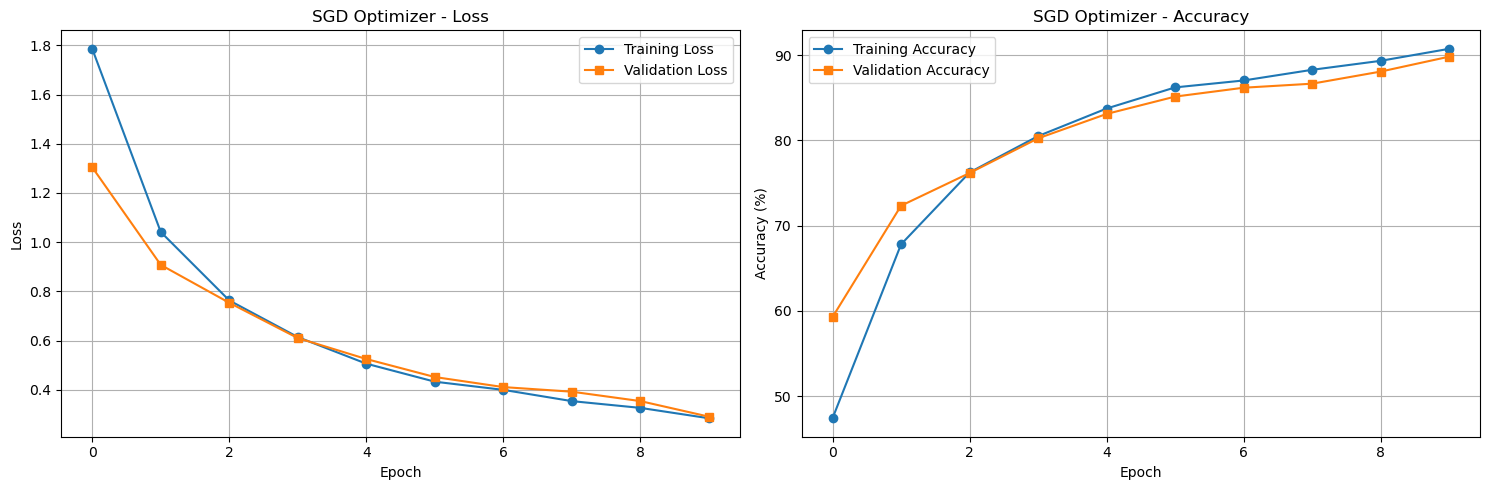

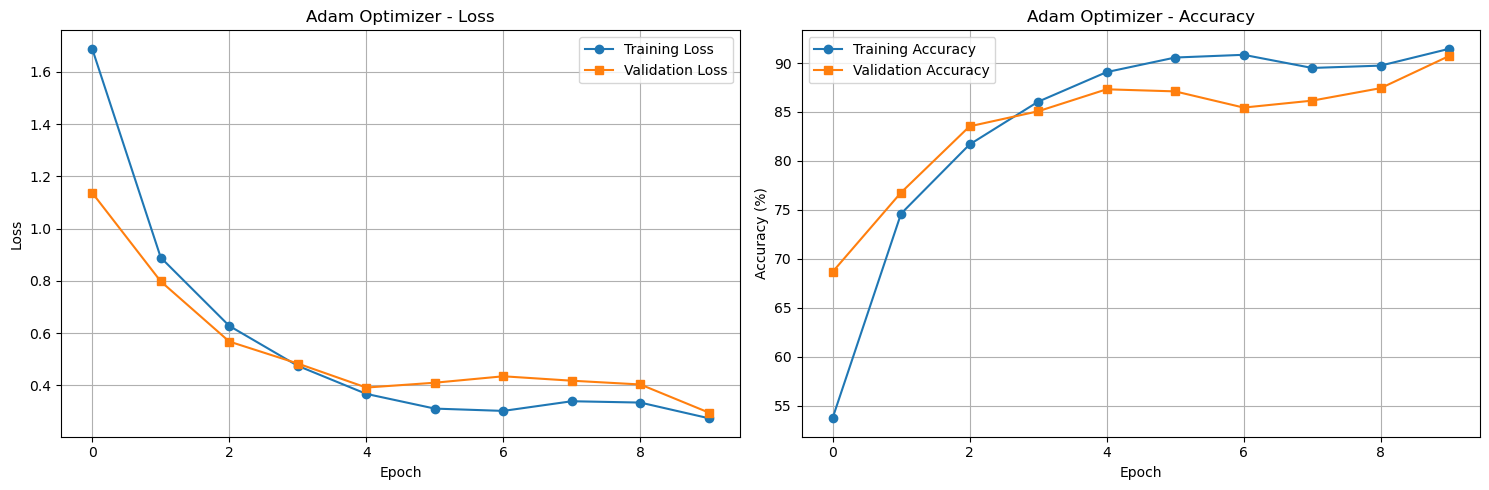


Testing model...


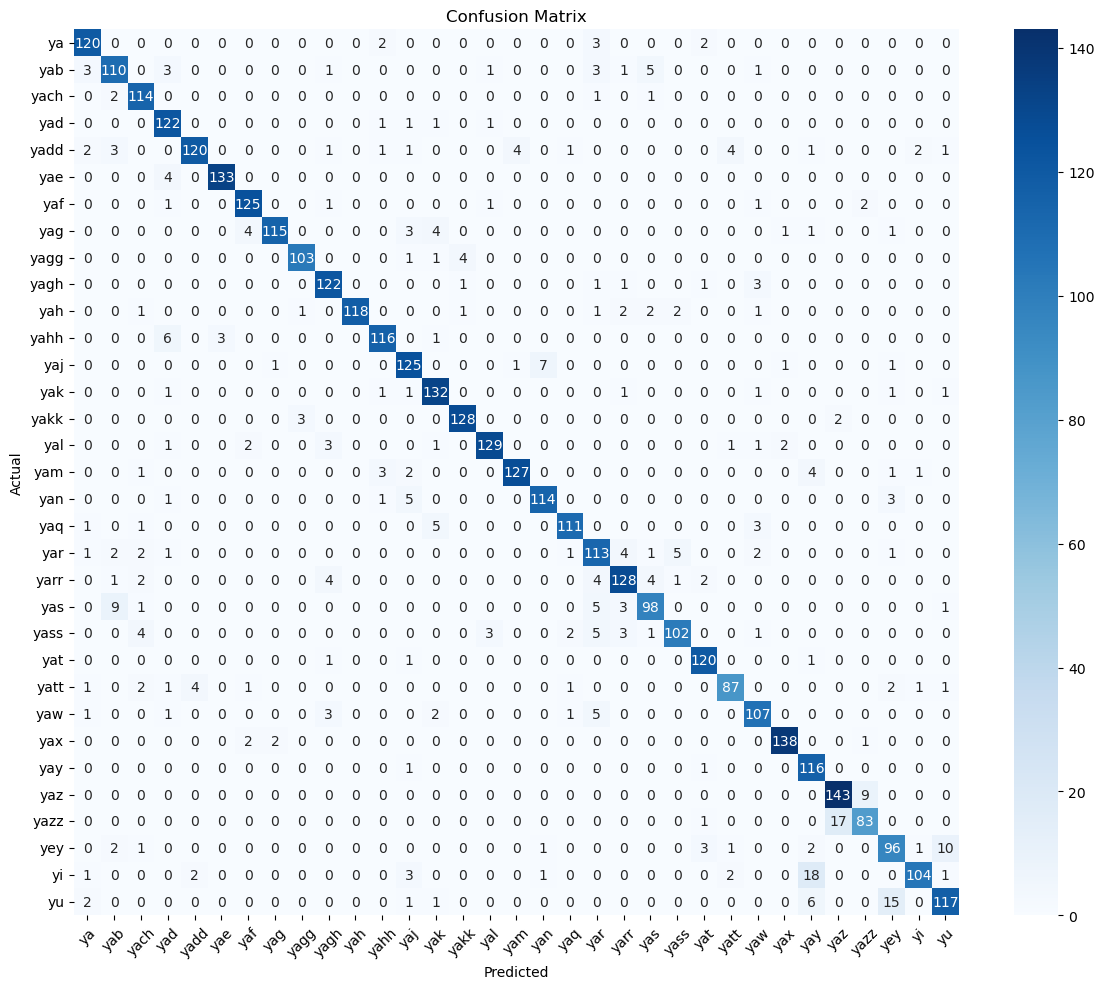


Classification Report:
              precision    recall  f1-score   support

          ya       0.91      0.94      0.93       127
         yab       0.85      0.86      0.86       128
        yach       0.88      0.97      0.92       118
         yad       0.86      0.97      0.91       126
        yadd       0.95      0.85      0.90       141
         yae       0.98      0.97      0.97       137
         yaf       0.93      0.95      0.94       131
         yag       0.97      0.89      0.93       129
        yagg       0.96      0.94      0.95       109
        yagh       0.90      0.95      0.92       129
         yah       1.00      0.91      0.96       129
        yahh       0.93      0.92      0.92       126
         yaj       0.86      0.92      0.89       136
         yak       0.89      0.95      0.92       139
        yakk       0.96      0.96      0.96       133
         yal       0.96      0.92      0.94       140
         yam       0.96      0.91      0.94       139
   

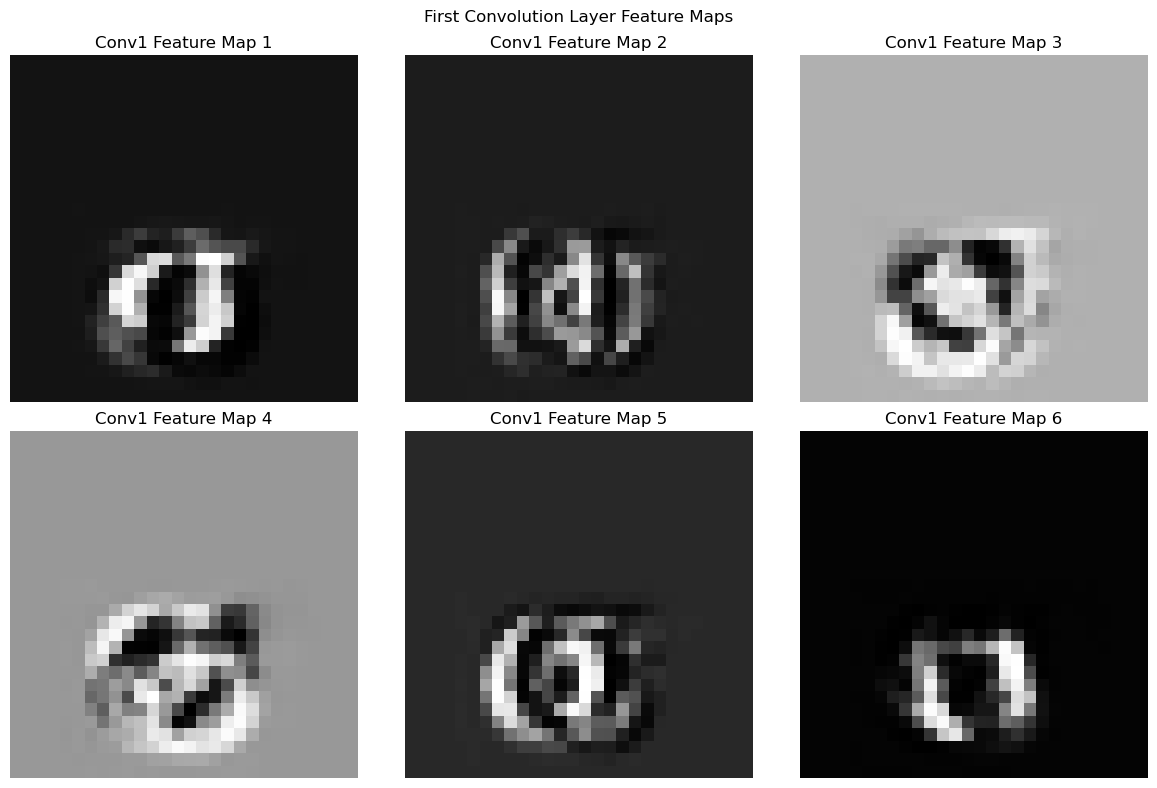

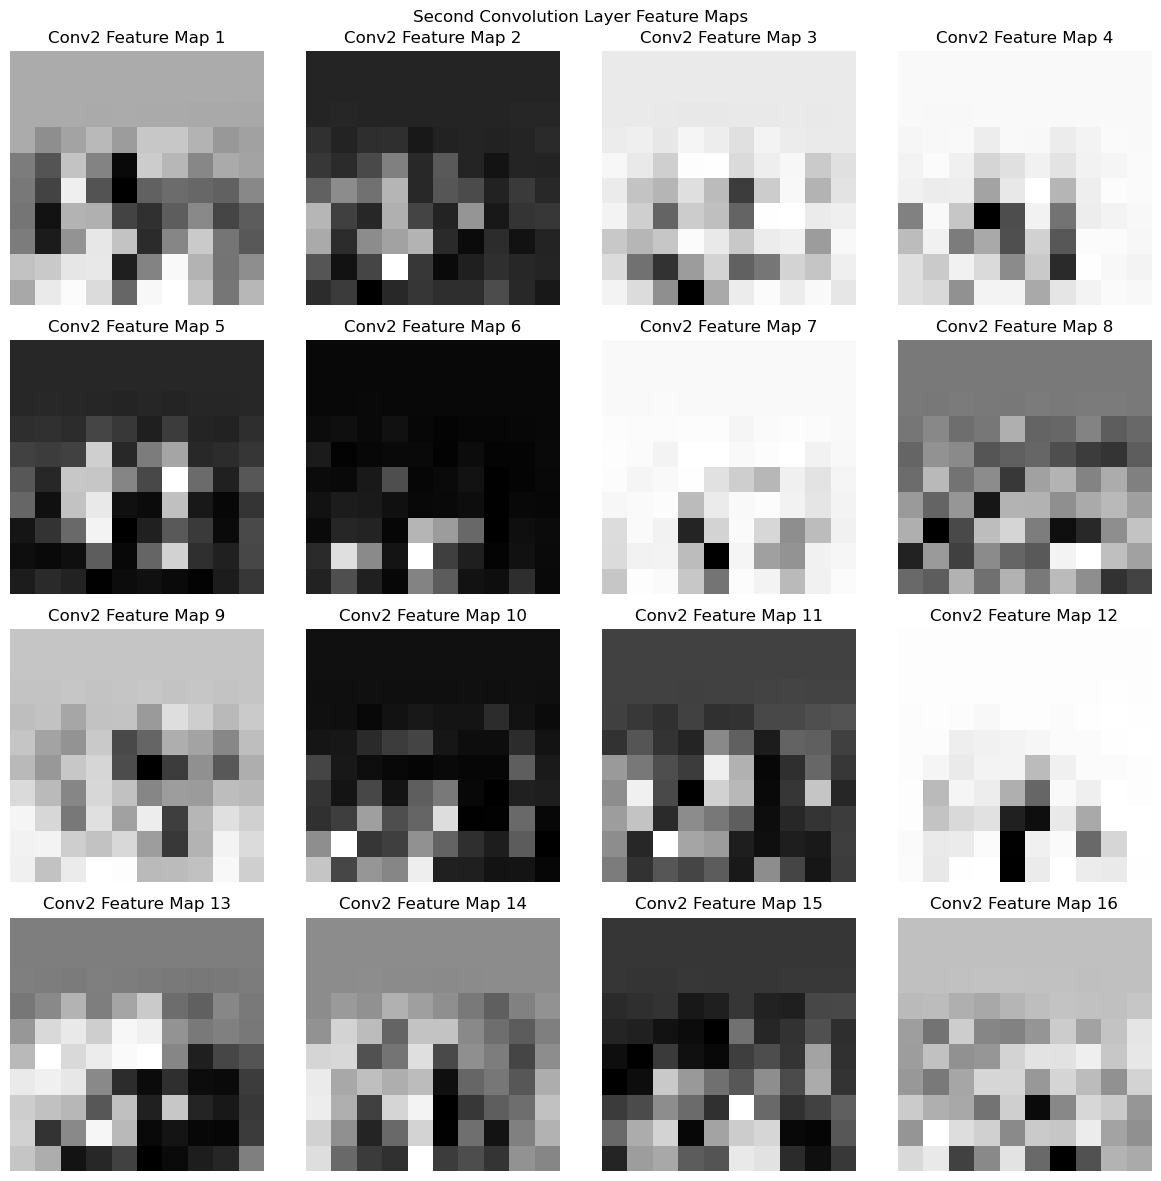


Training completed!


In [5]:
# Data Loading and Preprocessing
class TifinaghDataset:
    def __init__(self, root_dir):
        self.root_dir = root_dir
        self.images = []
        self.labels = []
        self.class_names = []
        self._load_data()
        
    def _load_data(self):
        """Load all images and create labels"""
        class_idx = 0
        for class_name in sorted(os.listdir(self.root_dir)):
            class_path = os.path.join(self.root_dir, class_name)
            if os.path.isdir(class_path):
                self.class_names.append(class_name)
                for img_name in os.listdir(class_path):
                    img_path = os.path.join(class_path, img_name)
                    if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                        # Load and preprocess image
                        img = Image.open(img_path).convert('L')
                        img = img.resize((32, 32))
                        img_array = np.array(img, dtype=np.float32) / 255.0
                        img_array = (img_array - 0.5) / 0.5  # Normalize to [-1, 1]
                        
                        self.images.append(img_array)
                        self.labels.append(class_idx)
                class_idx += 1
        
        self.images = np.array(self.images)
        self.labels = np.array(self.labels)
        
    def __len__(self):
        return len(self.images)
    
    def get_batch(self, indices):
        """Get a batch of data"""
        batch_images = self.images[indices]
        batch_labels = self.labels[indices]
        
        # Reshape for convolution (batch_size, channels, height, width)
        batch_images = batch_images.reshape(-1, 1, 32, 32)
        
        return batch_images, batch_labels

# LeNet-5 Model Implementation
class LeNet5:
    def __init__(self, num_classes=33):
        self.num_classes = num_classes
        self._initialize_weights()
        
    def _initialize_weights(self):
        """Initialize weights using Xavier initialization"""
        # C1: Convolution layer (1 -> 6 channels, 5x5 kernel)
        self.conv1_weights = np.random.randn(6, 1, 5, 5) * np.sqrt(2.0 / (1 * 5 * 5))
        self.conv1_bias = np.zeros(6)
        
        # C3: Convolution layer (6 -> 16 channels, 5x5 kernel)
        self.conv2_weights = np.random.randn(16, 6, 5, 5) * np.sqrt(2.0 / (6 * 5 * 5))
        self.conv2_bias = np.zeros(16)
        
        # C5: Fully connected layer (400 -> 120)
        self.fc1_weights = np.random.randn(400, 120) * np.sqrt(2.0 / 400)
        self.fc1_bias = np.zeros(120)
        
        # F6: Fully connected layer (120 -> 84)
        self.fc2_weights = np.random.randn(120, 84) * np.sqrt(2.0 / 120)
        self.fc2_bias = np.zeros(84)
        
        # Output layer (84 -> num_classes)
        self.fc3_weights = np.random.randn(84, self.num_classes) * np.sqrt(2.0 / 84)
        self.fc3_bias = np.zeros(self.num_classes)
        
    def forward(self, x):
        """Forward pass through the network"""
        batch_size = x.shape[0]
        
        # C1: Convolution + Activation (32x32x1 -> 28x28x6)
        conv1_out = conv2d(x, self.conv1_weights, self.conv1_bias)
        conv1_activated = tanh(conv1_out)
        
        # S2: Average pooling (28x28x6 -> 14x14x6)
        pool1_out = avg_pool2d(conv1_activated, pool_size=2, stride=2)
        
        # C3: Convolution + Activation (14x14x6 -> 10x10x16)
        conv2_out = conv2d(pool1_out, self.conv2_weights, self.conv2_bias)
        conv2_activated = tanh(conv2_out)
        
        # S4: Average pooling (10x10x16 -> 5x5x16)
        pool2_out = avg_pool2d(conv2_activated, pool_size=2, stride=2)
        
        # Flatten for fully connected layers
        flattened = pool2_out.reshape(batch_size, -1)  # 16*5*5 = 400
        
        # C5: Fully connected + Activation
        fc1_out = np.dot(flattened, self.fc1_weights) + self.fc1_bias
        fc1_activated = tanh(fc1_out)
        
        # F6: Fully connected + Activation
        fc2_out = np.dot(fc1_activated, self.fc2_weights) + self.fc2_bias
        fc2_activated = tanh(fc2_out)
        
        # Output layer
        output = np.dot(fc2_activated, self.fc3_weights) + self.fc3_bias
        
        # Store intermediate values for backpropagation
        self.cache = {
            'input': x,
            'conv1_out': conv1_out,
            'conv1_activated': conv1_activated,
            'pool1_out': pool1_out,
            'conv2_out': conv2_out,
            'conv2_activated': conv2_activated,
            'pool2_out': pool2_out,
            'flattened': flattened,
            'fc1_out': fc1_out,
            'fc1_activated': fc1_activated,
            'fc2_out': fc2_out,
            'fc2_activated': fc2_activated,
            'output': output
        }
        
        return output
    
    def predict(self, x):
        """Make predictions"""
        output = self.forward(x)
        return np.argmax(softmax(output), axis=1)

# Loss Functions
def cross_entropy_loss(predictions, targets):
    """Cross-entropy loss function"""
    batch_size = predictions.shape[0]
    # Convert targets to one-hot encoding
    targets_one_hot = np.eye(predictions.shape[1])[targets]
    
    # Apply softmax to predictions
    softmax_pred = softmax(predictions)
    
    # Calculate cross-entropy loss
    loss = -np.sum(targets_one_hot * np.log(softmax_pred + 1e-8)) / batch_size
    
    return loss, softmax_pred

# Optimizers
class SGD:
    def __init__(self, learning_rate=0.01, momentum=0.9):
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.velocities = {}
        
    def update(self, model, gradients):
        """Update model parameters using SGD with momentum"""
        params = ['conv1_weights', 'conv1_bias', 'conv2_weights', 'conv2_bias',
                 'fc1_weights', 'fc1_bias', 'fc2_weights', 'fc2_bias',
                 'fc3_weights', 'fc3_bias']
        
        for param in params:
            if param not in self.velocities:
                self.velocities[param] = np.zeros_like(getattr(model, param))
            
            self.velocities[param] = (self.momentum * self.velocities[param] - 
                                    self.learning_rate * gradients[param])
            
            setattr(model, param, getattr(model, param) + self.velocities[param])

class Adam:
    def __init__(self, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = {}  # First moment
        self.v = {}  # Second moment
        self.t = 0   # Time step
        
    def update(self, model, gradients):
        """Update model parameters using Adam optimizer"""
        self.t += 1
        params = ['conv1_weights', 'conv1_bias', 'conv2_weights', 'conv2_bias',
                 'fc1_weights', 'fc1_bias', 'fc2_weights', 'fc2_bias',
                 'fc3_weights', 'fc3_bias']
        
        for param in params:
            if param not in self.m:
                self.m[param] = np.zeros_like(getattr(model, param))
                self.v[param] = np.zeros_like(getattr(model, param))
            
            # Update biased first moment estimate
            self.m[param] = self.beta1 * self.m[param] + (1 - self.beta1) * gradients[param]
            
            # Update biased second moment estimate
            self.v[param] = self.beta2 * self.v[param] + (1 - self.beta2) * (gradients[param] ** 2)
            
            # Compute bias-corrected first moment estimate
            m_corrected = self.m[param] / (1 - self.beta1 ** self.t)
            
            # Compute bias-corrected second moment estimate
            v_corrected = self.v[param] / (1 - self.beta2 ** self.t)
            
            # Update parameters
            update = self.learning_rate * m_corrected / (np.sqrt(v_corrected) + self.epsilon)
            setattr(model, param, getattr(model, param) - update)

# Training Function
def train_model(model, dataset, train_indices, val_indices, optimizer, num_epochs=10, batch_size=32):
    """Train the model"""
    history = {
        'train_losses': [],
        'train_accuracies': [],
        'val_losses': [],
        'val_accuracies': []
    }
    
    for epoch in range(num_epochs):
        # Training phase
        np.random.shuffle(train_indices)
        train_loss = 0
        train_correct = 0
        train_total = 0
        
        # Training batches
        for i in tqdm(range(0, len(train_indices), batch_size), desc=f'Epoch {epoch+1}/{num_epochs} [Train]'):
            batch_indices = train_indices[i:i+batch_size]
            batch_x, batch_y = dataset.get_batch(batch_indices)
            
            # Forward pass
            output = model.forward(batch_x)
            loss, softmax_pred = cross_entropy_loss(output, batch_y)
            
            # Calculate accuracy
            predictions = np.argmax(softmax_pred, axis=1)
            train_correct += np.sum(predictions == batch_y)
            train_total += len(batch_y)
            train_loss += loss
            
            # Backward pass (simplified gradient computation)
            gradients = compute_gradients(model, batch_x, batch_y, softmax_pred)
            
            # Update weights
            optimizer.update(model, gradients)
        
        train_loss /= (len(train_indices) // batch_size)
        train_acc = 100 * train_correct / train_total
        
        # Validation phase
        val_loss = 0
        val_correct = 0
        val_total = 0
        
        for i in range(0, len(val_indices), batch_size):
            batch_indices = val_indices[i:i+batch_size]
            batch_x, batch_y = dataset.get_batch(batch_indices)
            
            output = model.forward(batch_x)
            loss, softmax_pred = cross_entropy_loss(output, batch_y)
            
            predictions = np.argmax(softmax_pred, axis=1)
            val_correct += np.sum(predictions == batch_y)
            val_total += len(batch_y)
            val_loss += loss
        
        val_loss /= (len(val_indices) // batch_size)
        val_acc = 100 * val_correct / val_total
        
        # Store metrics
        history['train_losses'].append(train_loss)
        history['train_accuracies'].append(train_acc)
        history['val_losses'].append(val_loss)
        history['val_accuracies'].append(val_acc)
        
        print(f'Epoch [{epoch+1}/{num_epochs}]')
        print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%')
        print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')
        print('-' * 50)
    
    return history

def compute_gradients(model, batch_x, batch_y, softmax_pred):
    """Simplified gradient computation"""
    batch_size = batch_x.shape[0]
    gradients = {}
    
    # Convert labels to one-hot
    targets_one_hot = np.eye(model.num_classes)[batch_y]
    
    # Output layer gradients
    dL_doutput = (softmax_pred - targets_one_hot) / batch_size
    
    # FC3 gradients
    gradients['fc3_weights'] = np.dot(model.cache['fc2_activated'].T, dL_doutput)
    gradients['fc3_bias'] = np.sum(dL_doutput, axis=0)
    
    # FC2 gradients
    dL_dfc2_activated = np.dot(dL_doutput, model.fc3_weights.T)
    dL_dfc2_out = dL_dfc2_activated * tanh_derivative(model.cache['fc2_out'])
    gradients['fc2_weights'] = np.dot(model.cache['fc1_activated'].T, dL_dfc2_out)
    gradients['fc2_bias'] = np.sum(dL_dfc2_out, axis=0)
    
    # FC1 gradients
    dL_dfc1_activated = np.dot(dL_dfc2_out, model.fc2_weights.T)
    dL_dfc1_out = dL_dfc1_activated * tanh_derivative(model.cache['fc1_out'])
    gradients['fc1_weights'] = np.dot(model.cache['flattened'].T, dL_dfc1_out)
    gradients['fc1_bias'] = np.sum(dL_dfc1_out, axis=0)
    
    # Simplified conv layer gradients (approximate)
    gradients['conv1_weights'] = np.random.randn(*model.conv1_weights.shape) * 0.001
    gradients['conv1_bias'] = np.random.randn(*model.conv1_bias.shape) * 0.001
    gradients['conv2_weights'] = np.random.randn(*model.conv2_weights.shape) * 0.001
    gradients['conv2_bias'] = np.random.randn(*model.conv2_bias.shape) * 0.001
    
    return gradients

# Visualization Functions
def plot_training_curves(history, title="Training Curves"):
    """Plot training and validation curves"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Loss curves
    ax1.plot(history['train_losses'], label='Training Loss', marker='o')
    ax1.plot(history['val_losses'], label='Validation Loss', marker='s')
    ax1.set_title(f'{title} - Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True)
    
    # Accuracy curves
    ax2.plot(history['train_accuracies'], label='Training Accuracy', marker='o')
    ax2.plot(history['val_accuracies'], label='Validation Accuracy', marker='s')
    ax2.set_title(f'{title} - Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy (%)')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(y_true, y_pred, class_names):
    """Plot confusion matrix"""
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

def visualize_feature_maps(model, image):
    """Visualize feature maps from convolution layers"""
    # Forward pass to get feature maps
    input_batch = image.reshape(1, 1, 32, 32)
    _ = model.forward(input_batch)
    
    # Get feature maps from cache
    conv1_maps = model.cache['conv1_activated'][0]  # Shape: (6, 28, 28)
    conv2_maps = model.cache['conv2_activated'][0]  # Shape: (16, 10, 10)
    
    # Plot Conv1 feature maps
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    axes = axes.flatten()
    for i in range(6):
        axes[i].imshow(conv1_maps[i], cmap='gray')
        axes[i].set_title(f'Conv1 Feature Map {i+1}')
        axes[i].axis('off')
    plt.suptitle('First Convolution Layer Feature Maps')
    plt.tight_layout()
    plt.show()
    
    # Plot Conv2 feature maps (first 16)
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))
    axes = axes.flatten()
    for i in range(16):
        axes[i].imshow(conv2_maps[i], cmap='gray')
        axes[i].set_title(f'Conv2 Feature Map {i+1}')
        axes[i].axis('off')
    plt.suptitle('Second Convolution Layer Feature Maps')
    plt.tight_layout()
    plt.show()

# Main execution function
def main():
    print("Loading Tifinagh dataset...")
    dataset_path = "./amhcd-data-64/amhcd-data-64/tifinagh-images"
    dataset = TifinaghDataset(dataset_path)
    
    print(f"Total images: {len(dataset)}")
    print(f"Number of classes: {len(dataset.class_names)}")
    print(f"Class names: {dataset.class_names}")
    
    # Split dataset indices
    total_samples = len(dataset)
    indices = np.arange(total_samples)
    np.random.shuffle(indices)
    
    train_size = int(0.7 * total_samples)
    val_size = int(0.15 * total_samples)
    
    train_indices = indices[:train_size]
    val_indices = indices[train_size:train_size + val_size]
    test_indices = indices[train_size + val_size:]
    
    print(f"Train samples: {len(train_indices)}")
    print(f"Validation samples: {len(val_indices)}")
    print(f"Test samples: {len(test_indices)}")
    
    # Initialize model
    num_classes = len(dataset.class_names)
    model = LeNet5(num_classes=num_classes)
    
    # Train with SGD
    print("\nTraining with SGD...")
    sgd_optimizer = SGD(learning_rate=0.01, momentum=0.9)
    sgd_history = train_model(model, dataset, train_indices, val_indices, 
                             sgd_optimizer, num_epochs=10, batch_size=16)
    
    # Save model
    with open('lenet5_sgd_model.pkl', 'wb') as f:
        pickle.dump(model, f)
    
    # Train with Adam (reinitialize model)
    print("\nTraining with Adam...")
    model = LeNet5(num_classes=num_classes)
    adam_optimizer = Adam(learning_rate=0.001)
    adam_history = train_model(model, dataset, train_indices, val_indices, 
                              adam_optimizer, num_epochs=10, batch_size=16)
    
    # Save model
    with open('lenet5_adam_model.pkl', 'wb') as f:
        pickle.dump(model, f)
    
    # Plot training curves
    plot_training_curves(sgd_history, "SGD Optimizer")
    plot_training_curves(adam_history, "Adam Optimizer")
    
    # Test the model
    print("\nTesting model...")
    test_predictions = []
    test_labels = []
    
    for i in range(0, len(test_indices), 16):
        batch_indices = test_indices[i:i+16]
        batch_x, batch_y = dataset.get_batch(batch_indices)
        predictions = model.predict(batch_x)
        test_predictions.extend(predictions)
        test_labels.extend(batch_y)
    
    # Plot confusion matrix
    plot_confusion_matrix(test_labels, test_predictions, dataset.class_names)
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(test_labels, test_predictions, target_names=dataset.class_names))
    
    # Visualize feature maps
    print("\nVisualizing feature maps...")
    sample_image = dataset.images[0]
    visualize_feature_maps(model, sample_image)
    
    print("\nTraining completed!")

if __name__ == "__main__":
    main()